In [1]:
# import pandas library because work/deal with dataframe
# To analysis of a data using matplotlib
# splitting a sample by using train_test_split
# apply a linear regression algorithm 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read csv begaluru data set
df = pd.read_csv("C:\practice_data_set\Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# check dimensionality of data set by using shape
df.shape

(13320, 9)

In [6]:
# drop unneccessary column by using drop method
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
# check information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [8]:
# To check null value by using sum to get a count
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# to remove null values row
df.dropna(inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
# To check unique value in size column
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# count of unique value
df['size'].nunique()

31

In [13]:
# create a function to separate by space and it convert zeroth index into an int
def separation(n):
    return int(n.split(" ")[0])

In [14]:
separation("2 BHK")


2

In [15]:
# create a function to separate by space and it convert zeroth index into an int and apply into a data frame
df['bhk'] = df['size'].apply(lambda X:int(X.split(" ")[0]))

In [16]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df1 = df.drop("size", axis=1)

In [18]:
df1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 620.9+ KB


In [20]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 620.9+ KB


In [22]:
df1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
len(df1['location'].unique())

1304

In [24]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
# To create a function convert the values in float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
is_float("1056")

True

In [27]:
# here they can give non-coverted value of float
df1[~(df1['total_sqft'].apply(is_float))]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [28]:
a = '2100 - 2850'
b = a.split(" - ")

In [29]:
b

['2100', '2850']

In [30]:
(float(b[0]) + float(b[1]))/2

2475.0

In [31]:
# using the below function find the average if value given in a range and if it is single then it just convert into a float
def convert(x):
    l=x.split(' - ')
    if len(l) == 2:
        return (float(l[0]) + float(l[1]))/2 
    try:        
        return float(x)
    except:
        return None

In [32]:
convert('2100 - 2850 - 1234')

In [33]:
convert('789')

789.0

In [34]:
df2 = df1.copy()

In [35]:
df2['total_sqft'] = df2['total_sqft'].apply(convert)

In [36]:
df2.shape

(13246, 5)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 620.9+ KB


In [38]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [39]:
df2.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [40]:
df2 = df2[df2.total_sqft.notnull()]

In [41]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [42]:
df2.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [43]:
df2.shape

(13200, 5)

In [44]:
# To find the value of per feet according to price
df2['price_per_feet'] = ((df2['price']*100000)/df2['total_sqft'])

In [45]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_feet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [46]:
# in a describe method gives value are scientifically/exponentially that can convert into an numbers/mathematics pd.set_option 
pd.set_option('display.float_format',lambda x : '%.5f' %x)

In [47]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_feet
count,13200.00000,13200.00000,13200.00000,13200.00000,13200.00000
mean,1555.30278,2.69114,112.27618,2.80083,7920.75915
std,1237.32345,1.33892,149.17600,1.29284,106727.15521
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4267.70135
50%,1275.00000,2.00000,71.85000,3.00000,5438.33148
75%,1672.00000,3.00000,120.00000,3.00000,7317.07317
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [48]:
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [49]:
df2['location'].nunique()

1298

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   total_sqft      13200 non-null  float64
 2   bath            13200 non-null  float64
 3   price           13200 non-null  float64
 4   bhk             13200 non-null  int64  
 5   price_per_feet  13200 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 721.9+ KB


In [51]:
# groupby create a group of location and value_counts gives the value of that particular group
df2.groupby('location')['location'].value_counts()

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: count, Length: 1298, dtype: int64

In [52]:
df2.shape

(13200, 6)

In [53]:
# location is convert into an string and remove the space  
df2['location'] = df2['location'].apply(lambda x : str(x))
df2['location'] = df2['location'].apply(lambda x :x.strip())

In [54]:
#  To form a group, count each group and sorting that values inascending order
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [55]:
# To find less than 10 values and it store a variable in "less_than_10"
less_than_10 = location_stats[location_stats <= 10]

In [56]:
less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [57]:
# To using less_than_10 store the values in "others" 
df2['location'] = df2['location'].apply(lambda x : 'others' if x in less_than_10 else x)

In [58]:
df2

,location,total_sqft,bath,price,bhk,price_per_feet
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000
...,...,...,...,...,...,...
13315,Whitefield,3453.00000,4.00000,231.00000,5,6689.83493
13316,others,3600.00000,5.00000,400.00000,4,11111.11111
13317,Raja Rajeshwari Nagar,1141.00000,2.00000,60.00000,2,5258.54514
13318,Padmanabhanagar,4689.00000,4.00000,488.00000,4,10407.33632


In [59]:
df2['location'].value_counts()

location
others             2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [60]:
df2.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
others                2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Pattandur Agrahara      11
Banjara Layout          11
HAL 2nd Stage           11
Doddaballapur           11
Kodigehalli             11
Name: location, Length: 241, dtype: int64

In [61]:
# Using describe method to find the different values of "price_per_feet"
df2['price_per_feet'].describe()

count      13200.00000
mean        7920.75915
std       106727.15521
min          267.82981
25%         4267.70135
50%         5438.33148
75%         7317.07317
max     12000000.00000
Name: price_per_feet, dtype: float64

In [62]:
df2

,location,total_sqft,bath,price,bhk,price_per_feet
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000
...,...,...,...,...,...,...
13315,Whitefield,3453.00000,4.00000,231.00000,5,6689.83493
13316,others,3600.00000,5.00000,400.00000,4,11111.11111
13317,Raja Rajeshwari Nagar,1141.00000,2.00000,60.00000,2,5258.54514
13318,Padmanabhanagar,4689.00000,4.00000,488.00000,4,10407.33632


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   total_sqft      13200 non-null  float64
 2   bath            13200 non-null  float64
 3   price           13200 non-null  float64
 4   bhk             13200 non-null  int64  
 5   price_per_feet  13200 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 721.9+ KB


In [64]:
df2.isnull().sum()

location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_feet    0
dtype: int64

In [65]:
# To find ratio of total_sqft to bhk and compare with less than 300
df2[df2.total_sqft/df2.bhk < 300]

,location,total_sqft,bath,price,bhk,price_per_feet
9,others,1020.00000,6.00000,370.00000,6,36274.50980
45,HSR Layout,600.00000,9.00000,200.00000,8,33333.33333
58,Murugeshpalya,1407.00000,4.00000,150.00000,6,10660.98081
68,Devarachikkanahalli,1350.00000,7.00000,85.00000,8,6296.29630
70,others,500.00000,3.00000,100.00000,3,20000.00000
...,...,...,...,...,...,...
13277,others,1400.00000,7.00000,218.00000,7,15571.42857
13279,others,1200.00000,5.00000,130.00000,6,10833.33333
13281,Margondanahalli,1375.00000,5.00000,125.00000,5,9090.90909
13303,Vidyaranyapura,774.00000,5.00000,70.00000,5,9043.92765


In [66]:
# if the ratio is greater than 300 it store into a new data frame
df3 = df2[~(df2.total_sqft/df2.bhk < 300)]
df3

,location,total_sqft,bath,price,bhk,price_per_feet
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000
...,...,...,...,...,...,...
13315,Whitefield,3453.00000,4.00000,231.00000,5,6689.83493
13316,others,3600.00000,5.00000,400.00000,4,11111.11111
13317,Raja Rajeshwari Nagar,1141.00000,2.00000,60.00000,2,5258.54514
13318,Padmanabhanagar,4689.00000,4.00000,488.00000,4,10407.33632


In [67]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_feet
count,12456.00000,12456.00000,12456.00000,12456.00000,12456.00000
mean,1590.18993,2.56278,111.18796,2.64900,6308.50283
std,1260.40480,1.08027,152.20337,0.97605,4168.12734
min,300.00000,1.00000,9.00000,1.00000,267.82981
25%,1115.00000,2.00000,49.00000,2.00000,4210.52632
50%,1300.00000,2.00000,70.00000,3.00000,5294.11765
75%,1700.00000,3.00000,115.00000,3.00000,6916.66667
max,52272.00000,16.00000,3600.00000,16.00000,176470.58824


In [68]:
# import numpy to perform mathematical operation
# To create new data frame to store output
# apply for loop in a location in a keys presnt a location and in a subdf store a single location data frame if it is present in multiple time
# to find mean value and standard deviation according to subdf
# To change the value according to price per feet to change minimum and maximum value
# using concat to join two data frame and it store into new variable
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
#     print(df_out)
    for keys, subdf in df.groupby('location'):
#         print(keys)
#         print(subdf)
         m = np.mean(subdf.price_per_feet)
         s = np.std(subdf.price_per_feet)
         reduced_df = subdf[(subdf.price_per_feet > (m-s)) & (subdf.price_per_feet < (m+s))]
#         print(reduced_df)
         df_out = pd.concat([df_out, reduced_df], ignore_index = True)
#         print(df_out)
    return df_out

In [69]:
df4 = remove_pps_outliers(df3)

In [70]:
df4.shape

(10242, 6)

In [71]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        10242 non-null  object 
 1   total_sqft      10242 non-null  float64
 2   bath            10242 non-null  float64
 3   price           10242 non-null  float64
 4   bhk             10242 non-null  int64  
 5   price_per_feet  10242 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 480.2+ KB


In [72]:
df4.isnull().sum()

location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_feet    0
dtype: int64

In [73]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_feet
count,10242.00000,10242.00000,10242.00000,10242.00000,10242.00000
mean,1504.02311,2.47442,90.99142,2.57264,5657.73599
std,876.79806,0.98191,86.14783,0.89724,2266.36884
min,300.00000,1.00000,10.00000,1.00000,1250.00000
25%,1108.00000,2.00000,49.00000,2.00000,4244.79671
50%,1282.00000,2.00000,67.00000,2.00000,5172.84678
75%,1650.00000,3.00000,100.00000,3.00000,6426.00059
max,30400.00000,16.00000,2200.00000,16.00000,24509.80392


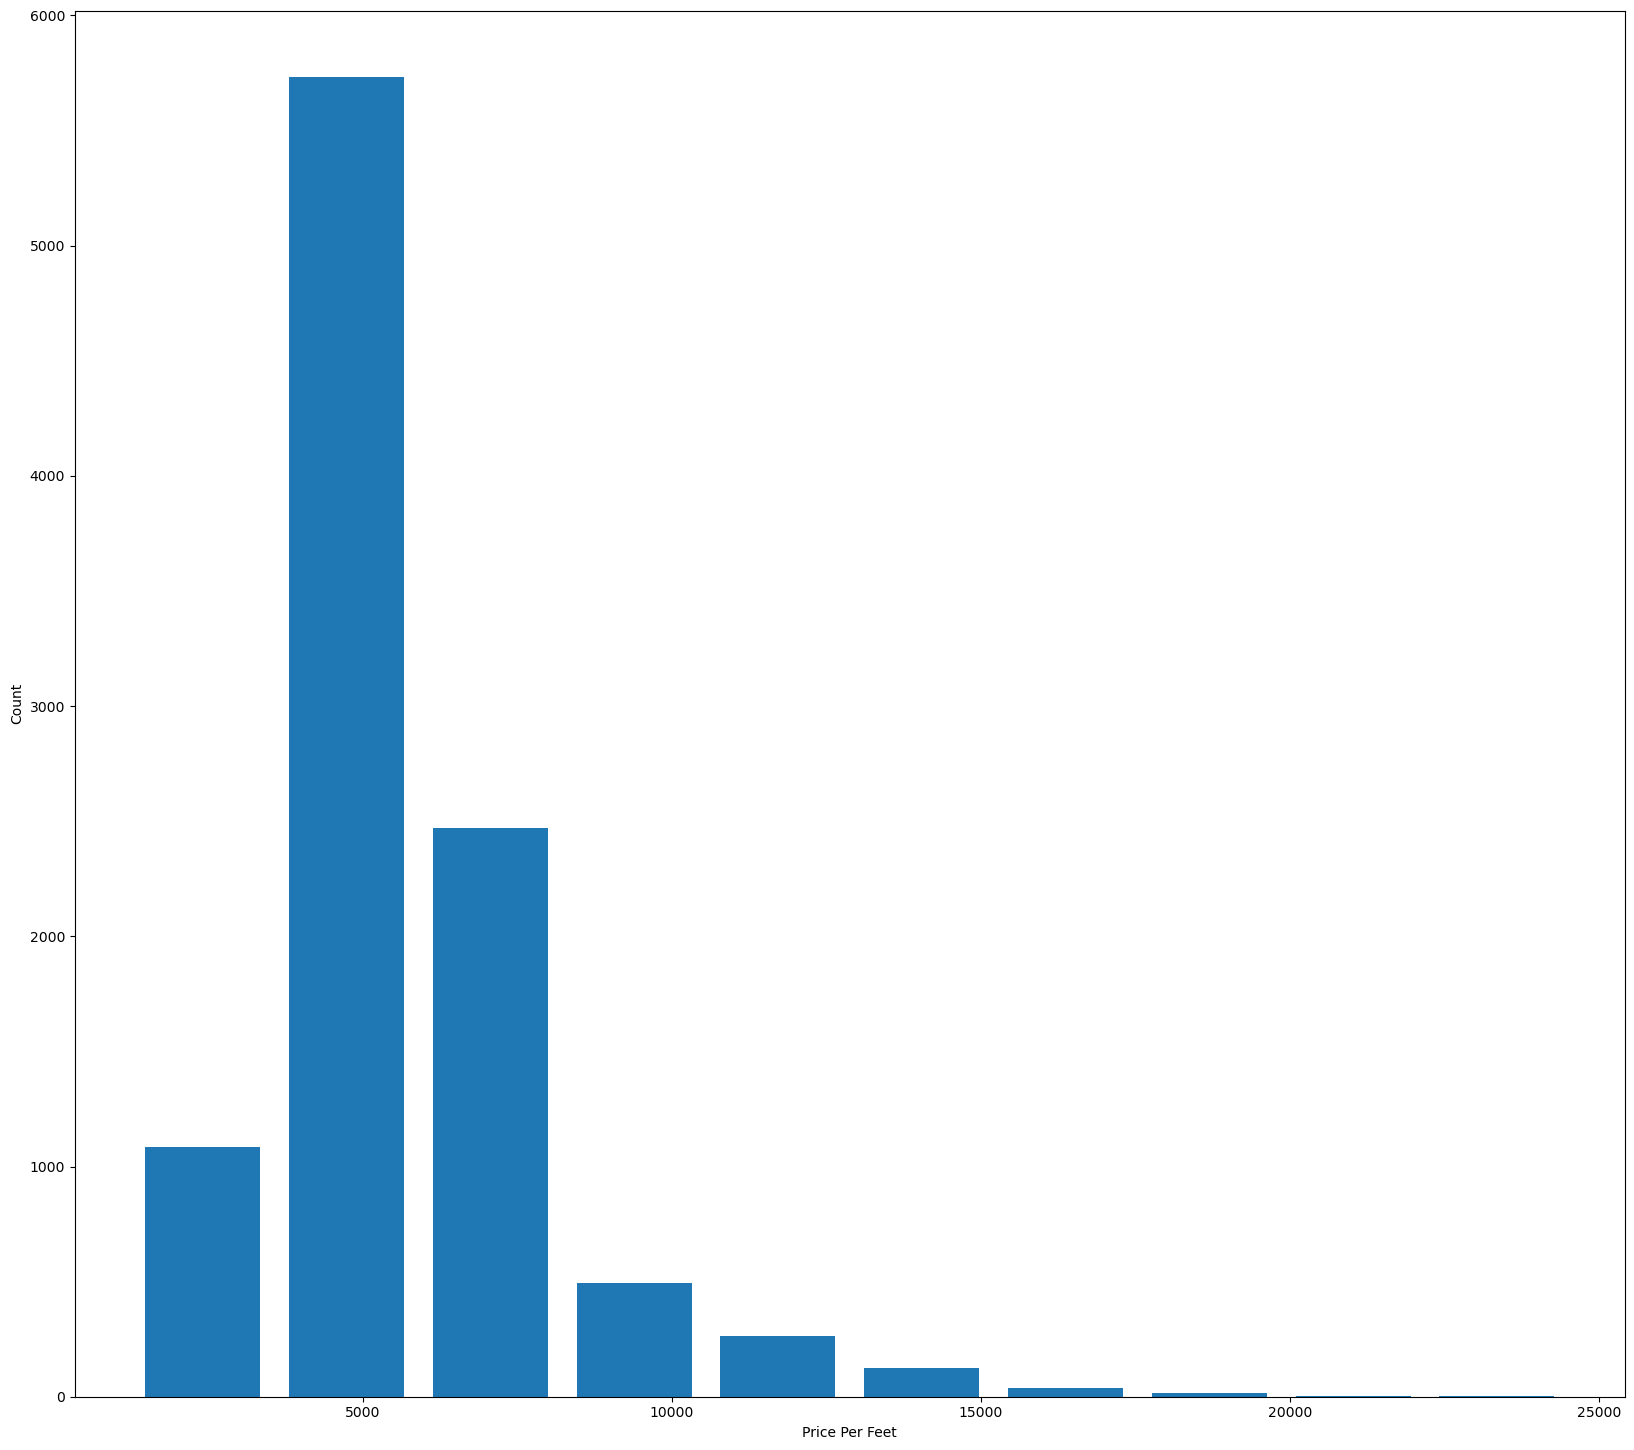

In [74]:

matplotlib.rcParams['figure.figsize'] = (20, 18)
plt.hist(df4.price_per_feet, rwidth=0.8)
plt.xlabel("Price Per Feet")
plt.ylabel("Count")
plt.show()

In [75]:
df4['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [76]:
df4[df4['bath'] > 10]

,location,total_sqft,bath,price,bhk,price_per_feet
5277,Neeladri Nagar,4000.00000,12.00000,160.00000,10,4000.00000
8483,others,12000.00000,12.00000,525.00000,10,4375.00000
8572,others,10000.00000,16.00000,550.00000,16,5500.00000
9306,others,6000.00000,12.00000,150.00000,11,2500.00000
9637,others,5425.00000,13.00000,275.00000,13,5069.12442


In [77]:
df4[df4.bath > df4.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_feet
1626,Chikkabanavar,2460.00000,7.00000,80.00000,4,3252.03252
5238,Nagasandra,7000.00000,8.00000,450.00000,4,6428.57143
6711,Thanisandra,1806.00000,6.00000,116.00000,3,6423.03433
8408,others,11338.00000,9.00000,1000.00000,6,8819.89769


In [78]:
df5 =  df4[df4.bath <= df4.bhk + 2]

In [79]:
df5.shape

(10238, 6)

In [80]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_feet
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567


In [81]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10238 entries, 0 to 10241
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        10238 non-null  object 
 1   total_sqft      10238 non-null  float64
 2   bath            10238 non-null  float64
 3   price           10238 non-null  float64
 4   bhk             10238 non-null  int64  
 5   price_per_feet  10238 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 559.9+ KB


In [82]:
df5.drop("price_per_feet", axis=1, inplace=True)

In [83]:
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2


In [84]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10238 entries, 0 to 10241
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10238 non-null  object 
 1   total_sqft  10238 non-null  float64
 2   bath        10238 non-null  float64
 3   price       10238 non-null  float64
 4   bhk         10238 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 479.9+ KB


In [85]:
# to convert object type data into an integer/bool
final = pd.get_dummies(data=df5, columns=['location'], drop_first=True)

In [86]:
final.head()

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,2850.00000,4.00000,428.00000,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.00000,3.00000,194.00000,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.00000,2.00000,235.00000,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.00000,2.00000,130.00000,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.00000,2.00000,148.00000,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10238 entries, 0 to 10241
Columns: 244 entries, total_sqft to location_others
dtypes: bool(240), float64(3), int64(1)
memory usage: 2.7 MB


In [88]:
X = final.drop('price',axis=1)

In [89]:
X.head()

,total_sqft,bath,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,2850.00000,4.00000,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.00000,3.00000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.00000,2.00000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.00000,2.00000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.00000,2.00000,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
y = final.price

In [91]:
y.head()

0   428.00000
1   194.00000
2   235.00000
3   130.00000
4   148.00000
Name: price, dtype: float64

In [92]:
# splitting a training and testing sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [93]:
X_train.shape

(8190, 243)

In [94]:
X_test.shape

(2048, 243)

In [95]:
# apply a linear regression algorithm because output column values are in a continuous 
# it perform various operation/method 1. fit ( to fit a sample in a y = mx +c ) 2. To find score 3. To find prediction

In [96]:
model = LinearRegression()

In [97]:
model.fit(X_train,y_train)

LinearRegression()

In [98]:
model.score(X_test,y_test)

0.797446318080304

In [99]:
y_pred = model.predict(X_test)

In [100]:
y_pred

array([ 76.40209941, 261.49567136,  23.38813818, ...,  53.21326239,
        63.41037625,  57.33575007])

In [101]:
y_test[:5]

5205    60.00000
7755   260.00000
4413    40.00000
7210    57.00000
4741   108.00000
Name: price, dtype: float64

In [102]:
y_pred[:5]

array([ 76.40209941, 261.49567136,  23.38813818,  61.60913066,
       101.53746984])

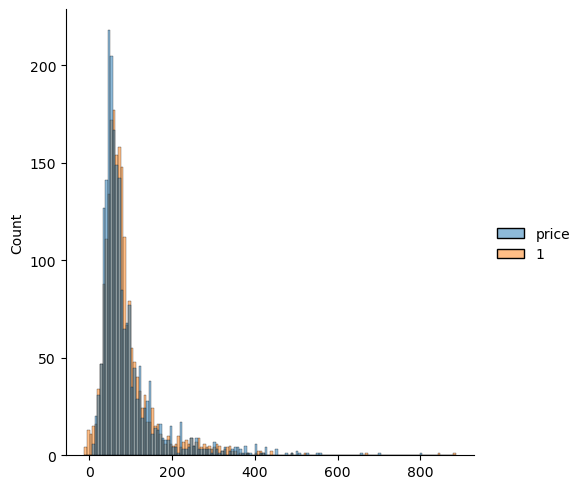

In [103]:
# displot use because output values are a continuous, it can represent the distribution of continuous data variable
sns.displot((y_test,y_pred))
plt.show()